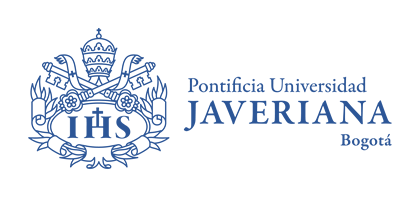

# Tecnologías emergentes - Proyecto

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Alejandro Enrique Suárez Acosta

In [14]:
# pip install -r requirements.txt

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import cv2


In [16]:
import tensorflow as tf

# Check for GPU availability
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print("GPU is available.")
else:
    print("GPU is NOT available.")

GPU is NOT available.


In [17]:
#import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Get the current working directory
cwd = os.getcwd()

# Directory containing your data folders
data_dir = os.path.join(cwd, 'data')

# Inicializa listas para almacenar las imágenes y sus etiquetas
images = []
labels = []

classes = ['cloudy', 'water', 'green_area', 'desert']


In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Iterate through the classes and load the images
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        # Read the image and resize if needed
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize to 224x224 pixels
        images.append(img)
        labels.append(class_name)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert the labels to integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Convert the integer labels to one-hot vectors
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# Create image data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and testing data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Creacion del primer modelo de red neuronal convolusional

La arquitectura de este modelo se basa en la arquitectura VGG16, esta arquitectura se compone de 5 bloques de convolución y pooling, seguido de una capa de GlobalAveragePooling2D y dos capas densas.

In [19]:
# Create a CNN model
inputs = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu', padding="same")(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding="same")(x)
x = Conv2D(64, (3, 3), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding="same")(x)
x = Conv2D(128, (3, 3), activation='relu', padding="same")(x)
x = Conv2D(128, (3, 3), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding="same")(x)
x = Conv2D(256, (3, 3), activation='relu', padding="same")(x)
x = Conv2D(256, (3, 3), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(512, (3, 3), activation='relu', padding="same")(x)
x = Conv2D(512, (3, 3), activation='relu', padding="same")(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
# x = Dense(32, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.AUC(), tf.keras.metrics.F1Score()])
              
model.summary()



Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,837,572 (22.27 MB)

 Trainable params: 5,836,612 (22.26 MB)

 Non-trainable params: 960 (3.75 KB)

# Entrenar el modelo

In [20]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8319 - auc_6: 0.9614 - f1_score: 0.8341 - loss: 0.4398 - precision_6: 0.8771 - recall_6: 0.7929 - val_accuracy: 0.3957 - val_auc_6: 0.6810 - val_f1_score: 0.2499 - val_loss: 1.2705 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.9235 - auc_6: 0.9896 - f1_score: 0.9248 - loss: 0.2210 - precision_6: 0.9248 - recall_6: 0.9219 - val_accuracy: 0.4153 - val_auc_6: 0.6421 - val_f1_score: 0.2648 - val_loss: 1.6497 - val_precision_6: 0.5674 - val_recall_6: 0.3398
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.9422 - auc_6: 0.9938 - f1_score: 0.9419 - loss: 0.1699 - precision_6: 0.9427 - recall_6: 0.9404 - val_accuracy: 0.4179 - val_auc_6: 0.6162 - val_f1_score: 0.2897 - val_loss: 2.8236 - val_precision_6: 0.4183 - val_recall_6: 0.4179
Epoch 4/10
 26/141 ━━━━━━━━━━━━━━━━━━━━ 1:55 1s/step - accuracy: 0.9285 - auc_6: 0.9929 - f1_score: 0.9279 - los

KeyboardInterrupt: 

# Evaluación del modelo

In [ ]:
# Evaluate the model
loss, accuracy, recall, precision, auc, f1 = model.evaluate(test_generator)
print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'AUC: {auc*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')

# Creación del segundo modelo de red neuronal convolusional

La arquitectura de este modelo se cambia la capa de activacion de la ultima capa a 'sigmoid'.

In [ ]:
# Create a CNN model
inputs = Input(shape=(224, 224, 3))
x2 = Conv2D(32, (3, 3), activation='relu', padding="same")(inputs)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D((2, 2), strides=(2,2))(x2)
x2 = Conv2D(64, (3, 3), activation='relu', padding="same")(x2)
x2 = Conv2D(64, (3, 3), activation='relu', padding="same")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D((2, 2), strides=(2,2))(x2)
x2 = Conv2D(128, (3, 3), activation='relu', padding="same")(x2)
x2 = Conv2D(128, (3, 3), activation='relu', padding="same")(x2)
x2 = Conv2D(128, (3, 3), activation='relu', padding="same")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D((2, 2), strides=(2,2))(x2)
x2 = Conv2D(256, (3, 3), activation='relu', padding="same")(x2)
x2 = Conv2D(256, (3, 3), activation='relu', padding="same")(x2)
x2 = Conv2D(256, (3, 3), activation='relu', padding="same")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D((2, 2), strides=(2,2))(x2)
x2 = Conv2D(512, (3, 3), activation='relu', padding="same")(x2)
x2 = Conv2D(512, (3, 3), activation='relu', padding="same")(x2)
x2 = GlobalAveragePooling2D()(x2)
x2 = Dense(512, activation='relu')(x2)
x2 = Dense(256, activation='relu')(x2)
outputs2 = Dense(4, activation='sigmoid')(x2)

model2 = Model(inputs=inputs, outputs=outputs2)

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model2.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.AUC(), tf.keras.metrics.F1Score()])

model2.summary()

# Entrenar el modelo

In [ ]:
history2 = model2.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluación del modelo

In [ ]:
# Evaluate the model
loss, accuracy, recall, precision, auc, f1 = model2.evaluate(test_generator)
print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'AUC: {auc*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')


# Creación del tercer modelo de red neuronal convolusional

Este simplifica la arquitectura porque tiene menos capas convolucionales. Ademas de esto, se cambia a la funcion de activacion 'tanh' y la ultima capa en 'softmax'

In [ ]:
# Create a simpler CNN model
inputs = Input(shape=(224, 224, 3))
x3 = Conv2D(32, (3, 3), activation='tanh', padding="same")(inputs)
x3 = MaxPooling2D((2, 2), strides=(2,2))(x3)
x3 = Conv2D(64, (3, 3), activation='tanh', padding="same")(x3)
x3 = MaxPooling2D((2, 2), strides=(2,2))(x3)
x3 = Conv2D(128, (3, 3), activation='tanh', padding="same")(x3)
x3 = MaxPooling2D((2, 2), strides=(2,2))(x3)
x3 = Conv2D(256, (3, 3), activation='tanh', padding="same")(x3)
x3 = MaxPooling2D((2, 2), strides=(2,2))(x3)
x3 = GlobalAveragePooling2D()(x3)
x3 = Dense(256, activation='tanh')(x3)
outputs3 = Dense(4, activation='softmax')(x3)

model3 = Model(inputs=inputs, outputs=outputs3)

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model3.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.AUC(), tf.keras.metrics.F1Score()])

model3.summary()

# Entrenar el modelo

In [ ]:
history3 = model3.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluación del modelo

In [ ]:
# Evaluate the model
loss, accuracy, recall, precision, auc, f1 = model3.evaluate(test_generator)
print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'AUC: {auc*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')
